Подключим библиотеки:

In [9]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split

Работа с набором данных:

In [16]:
PATH = "creditcard_2023_reduced.csv"
COLUMNS_TO_DROP = ['id'] + [f"V{i}" for i in range(1, 19)]
print(COLUMNS_TO_DROP)
dataset = pd.read_csv(PATH).drop
dataset

['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17']


<bound method DataFrame.drop of            id        V1        V2        V3        V4        V5        V6  \
0      276515 -0.052802 -0.203172  0.542635 -1.042929  0.968922  0.058840   
1      350974 -0.274540  0.066590  0.067607  0.022056  0.123597 -0.360887   
2      567752 -0.388809  0.507026 -0.519729  1.074936 -0.583329 -0.338844   
3      549346 -2.169169  2.524054 -2.122467  1.201514 -2.559668 -2.474099   
4      476660 -1.036645 -1.760301 -0.401020  0.806500  2.039347 -1.758166   
...       ...       ...       ...       ...       ...       ...       ...   
56858   29518  0.849589 -0.585433  0.729549 -0.327941  0.226241  1.219256   
56859   17816 -0.013893 -0.135870  1.330575 -0.685742  0.407958  0.236184   
56860  479919  0.667985  0.225092 -0.672242  0.639674  0.182082 -0.359786   
56861  221365  1.636137 -0.625493  0.076147 -0.491590  0.123819 -0.112986   
56862  118080  1.043410 -0.468321  0.605835 -0.677181  0.073969  0.022986   

             V7        V8        V9  ...   

Проверим признаки на значимость и корреляцию:

<Axes: >

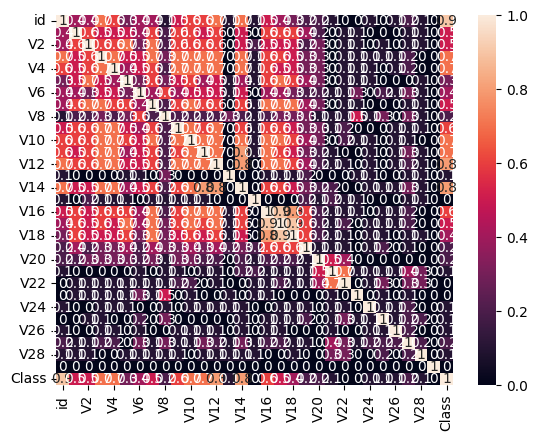

In [11]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1
    ),
    annot=True
)

Разделим данные на тестовые и тренировочные:

In [12]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop(['Class', 'id'], axis=1),
    dataset['Class'],
    test_size=0.2
)

Построим модель дерева решений, а также выведем матрицу сходства предсказанных значений тестового набора и эталонных значений:

Text(0.5, 1.0, 'Матрица сходства')

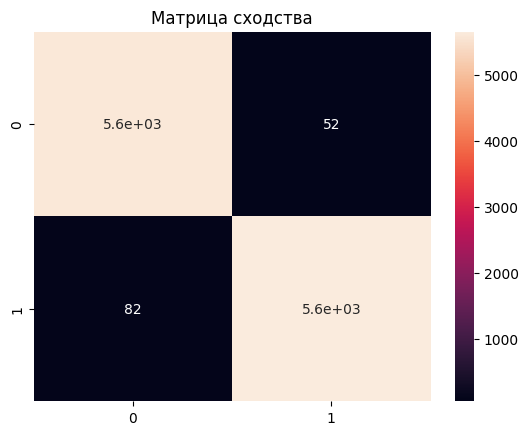

In [13]:
model = tree.DecisionTreeClassifier()
model.fit(train_input, train_output)

predictions = model.predict(test_input)
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)

sns.heatmap(confusion_matrix, annot=True)
plt.title("Матрица сходства")

Получим само дерево решений:

Text(0.5, 1.0, 'Дерево решений')

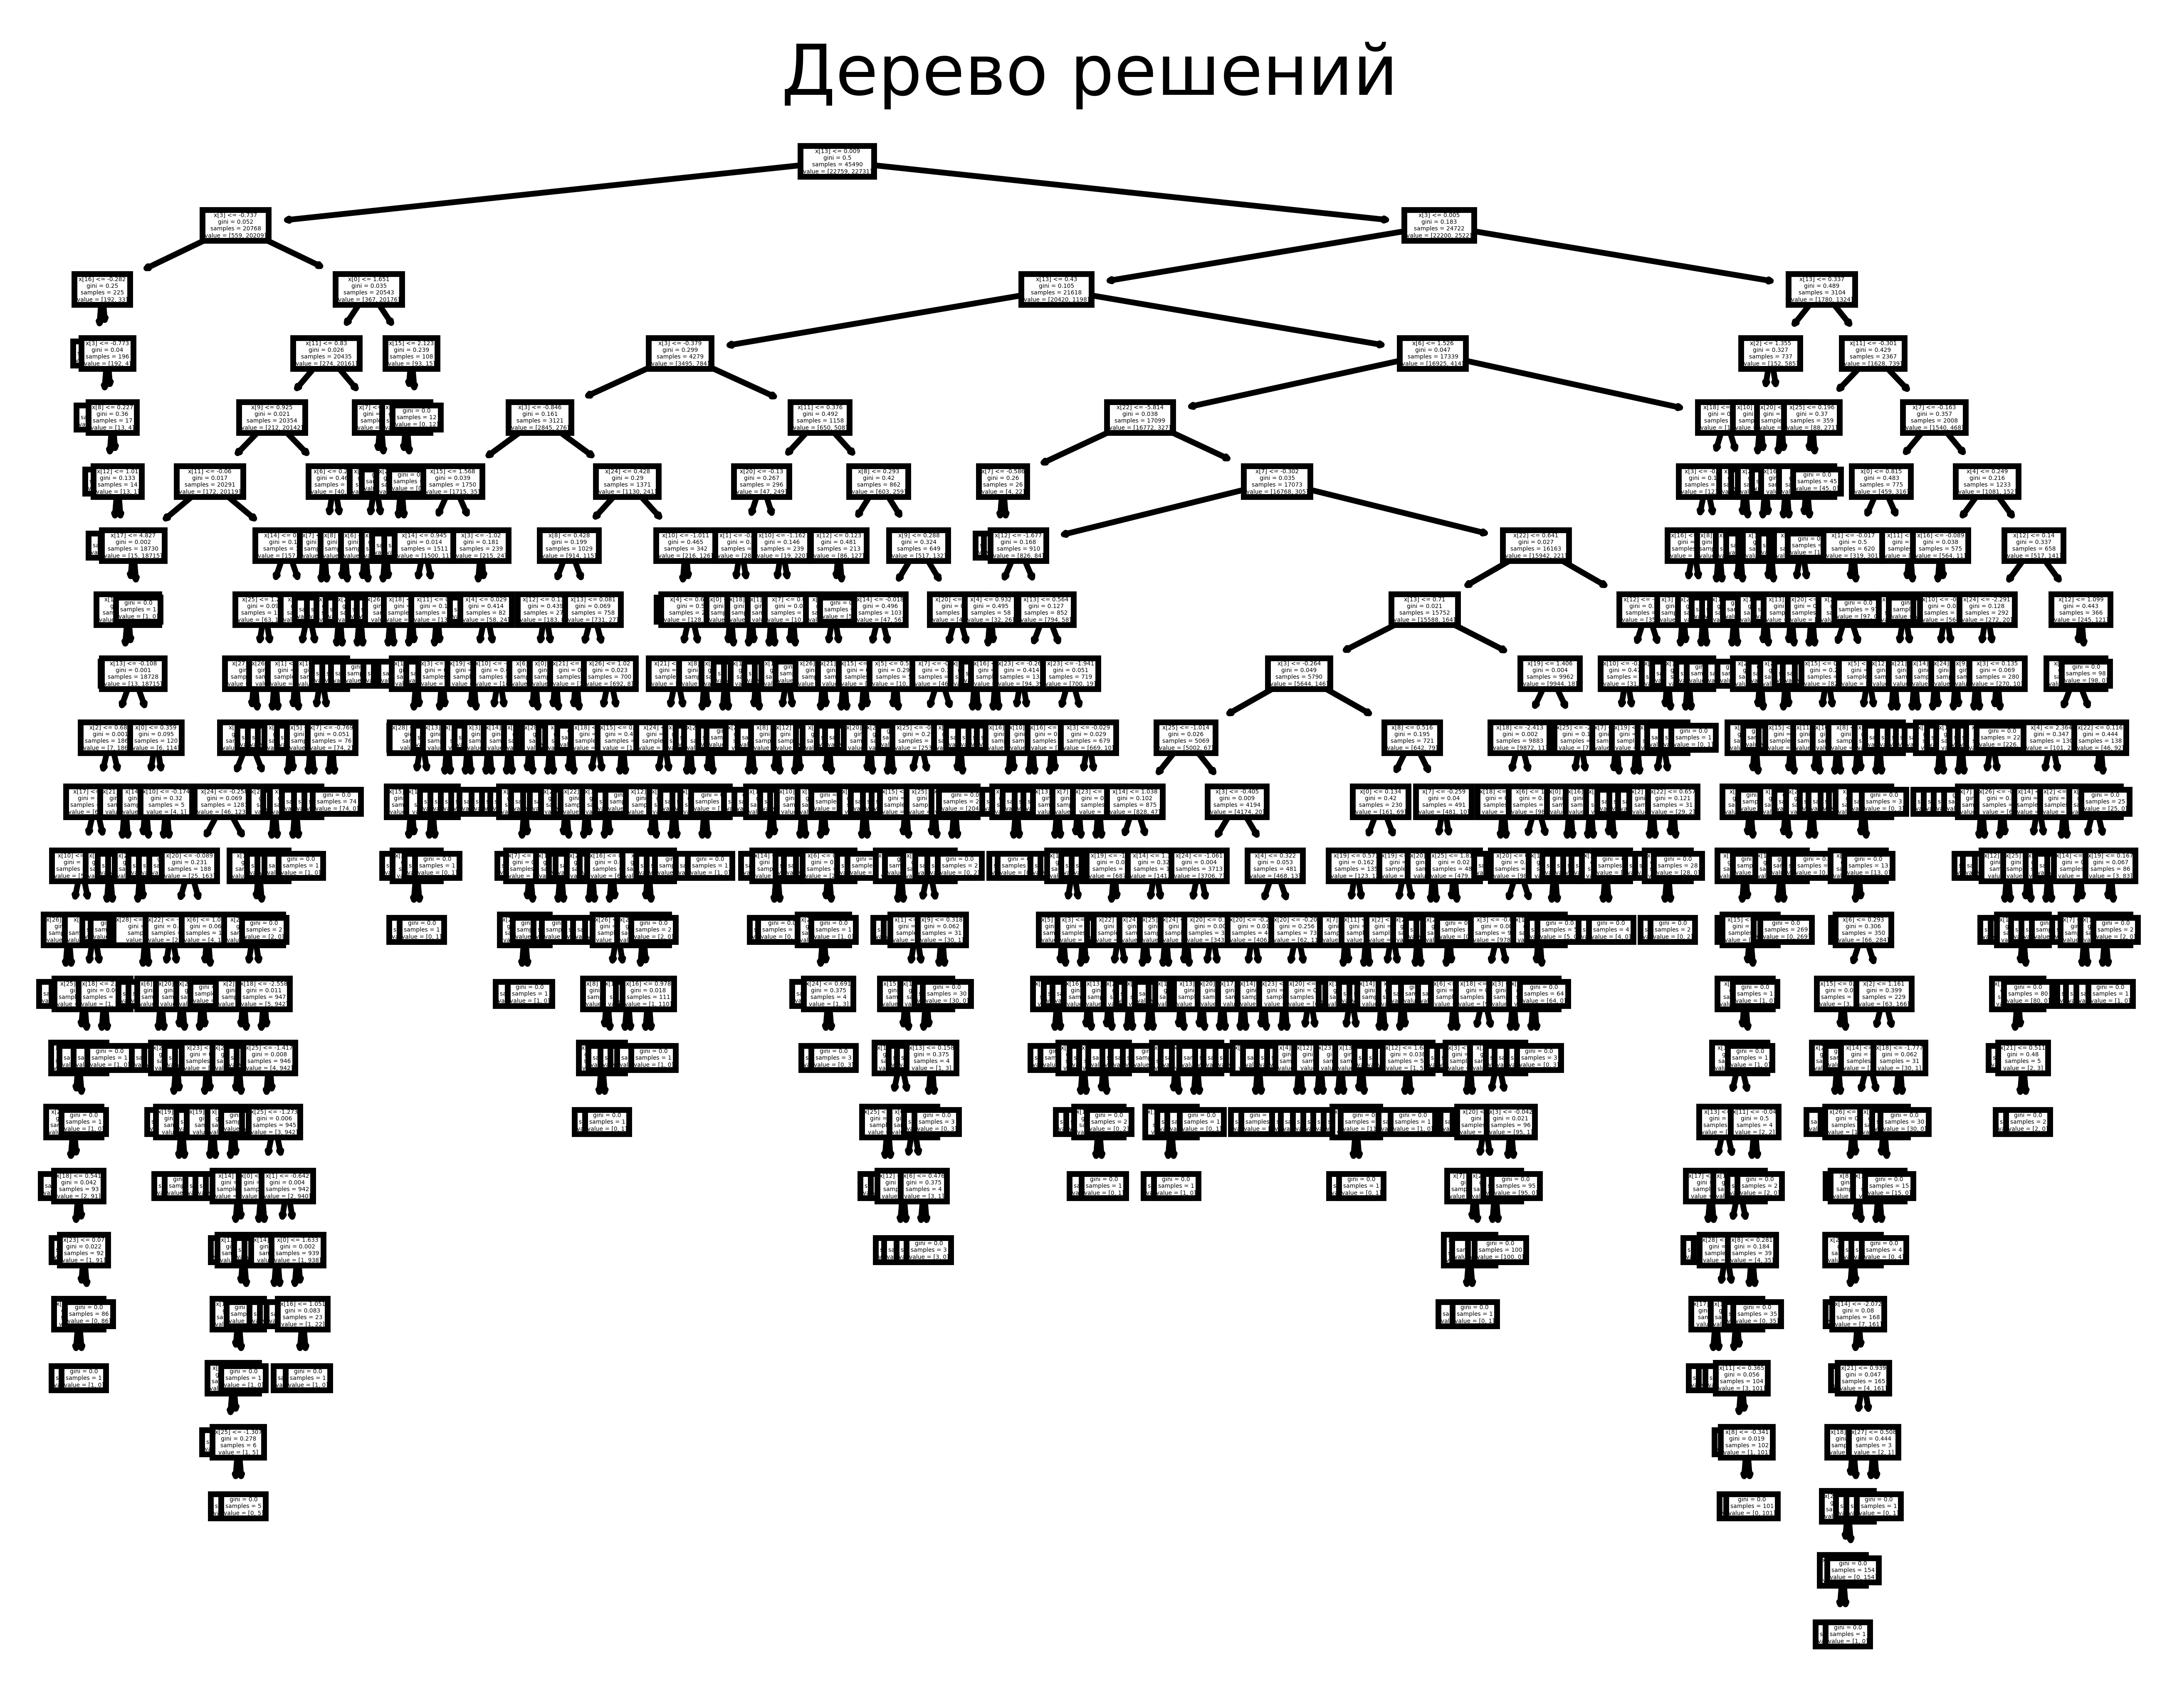

In [15]:
DPI = 1000
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")